In [265]:
import numpy as np
import matplotlib.pyplot as plt
import pydot
import pickle
import pathlib
import os
from scipy import stats
import random
from sklearn.metrics import r2_score
plt.rcParams['figure.figsize'] = [10, 5]
#import unicode

from scipy.optimize import curve_fit
import re
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

In [266]:
#directory = str(pathlib.Path(__file__).parent.resolve())
#script_path = str(pathlib.Path(__file__).parent.resolve())
directory = os.getcwd()
script_path = os.getcwd()
nameset,dictset = [],[]
refnameset,refdictset = [],[]

refsortset = []
sortset = []


for filename in os.listdir(directory):
    if filename.endswith(".txt") and '._' not in filename:
        if 'REF' not in filename:
            impath = os.path.join(directory, filename)
            nameset.append(impath)
            this_set = dict()
            with (open(impath, encoding = 'utf8', errors = 'ignore')) as f: #populate dict from text file
                for n in f:
                    pog = n.split('\t')
                    this_set[pog[0]] = pog[-1].count(',')
                f.close()
            try:
                this_set.pop('cell_name')
                this_set.pop('AB')
            except: pass
            dictset.append(this_set)
            sortset.append((impath, this_set))
        else:
            impath = os.path.join(directory, filename)
            refnameset.append(impath)
            this_set = dict()
            with (open(impath, encoding = 'utf8', errors = 'ignore')) as f: #populate dict from text file
                for n in f:
                    pog = n.split('\t')
                    this_set[pog[0]] = pog[-1].count(',')
                f.close()
            try:
                this_set.pop('cell_name')
                this_set.pop('AB')
            except: pass
            refdictset.append(this_set)
            refsortset.append((impath, this_set))
    
print(len(dictset),len(nameset))
print(len(refdictset),len(refnameset))
truncator = len(nameset)

nameset,dictset = [],[]
for n in sorted(sortset):
    nameset.append(n[0]);dictset.append(n[1])

refnameset,refdictset = [],[]
for n in sorted(refsortset):
    refnameset.append(n[0]);refdictset.append(n[1])

1322 1322
30 30


In [267]:
def remove_dangling_children(oldshi):
    poor = list(oldshi);dishi = dict()
    for n in range(1,len(poor)-1):
        if (len(poor[n]) == len(poor[n+1]) or len(poor[n]) == len(poor[n-1])) == False: dishi[poor[n]] = oldshi[poor[n]]
    return dishi

#'''
nameset,dictset = [],[]
for n in sorted(sortset):
    nameset.append(n[0]);dictset.append(remove_dangling_children(n[1]))
    
refnameset,refdictset = [],[]
for n in sorted(refsortset):
    refnameset.append(n[0]);refdictset.append(remove_dangling_children(n[1]))
#'''

In [268]:
print(len(dictset),len(nameset))
print(len(refdictset),len(refnameset))

1322 1322
30 30


In [269]:
#part 1 of common node
refnodelist = set(refdictset[0])
for n in refdictset:
    refnodelist = set(n).intersection(refnodelist)

In [270]:
#part 2 of common node
newdictset = []
for n in refdictset:
    newdict = dict()
    for i in refnodelist:
        newdict[i] = n[i]
    #print(set(newdict).issubset(set(n)))
    #print(len(newdict))
    newdictset.append(newdict)

#print(set(newdict).issubset(set(n)))
refdictset = newdictset

In [271]:
def scramble(dict_list):
    dict_return = []
    for element in dict_list:
        valuescramble = list(element.values())
        random.shuffle(valuescramble)
        keyscramble = list(element)
        random.shuffle(keyscramble)
        new_element = dict()
        for n in range(0,len(keyscramble)):
            new_element[keyscramble[n]] = valuescramble[n]
        dict_return.append(new_element)
    return dict_return
def globalize(dictn):
    globaldictset = []
    for i in dictn:
        tags = sorted(list(i));dip = dict()
        for n in tags:
            if n[0:-1] in i:
                dip[n] = i[n] + dip[n[:-1]]
            else: dip[n] = i[n]    
        globaldictset.append(dip)
    return globaldictset

In [272]:
#scrambledictset = scramble(dictset)
globaldictset = globalize(dictset)
#globalscrambledictset = globalize(scrambledictset)

#refscrambledictset = scramble(refdictset)
refglobaldictset = globalize(refdictset)
#refglobalscrambledictset = globalize(refscrambledictset)

In [273]:
qf = pd.read_csv('1368-embryos.csv', header=None).iloc[0]
df = pd.read_csv('1368-embryos.csv')
rdf = df.sort_values(by = 'embryo-ID')
cuttags = ['ABa','ABp','C','D','E','MS','P']
rearranger = [0,1,4,5,3,2,6]

match_links = []
match_links2 = []

findit = 0
notin = 0

o = 0
for n in range(0,df.shape[0]):
    #print(rdf.iloc[n][1] in nameset[o])
    if rdf.iloc[n][1] in nameset[o]:
        #match_links.append((o,n)) #, o in nameset, #n in dataframe
        match_links.append(n) #index is o in nameset, list value is n in dataframe
        tagref = 0
        for nm in list(globaldictset[o]):
            if cuttags[tagref] not in nm:
                try:
                    tagref = tagref + 1
                    if tagref > 6:
                        break
                except:
                    break
            #findit = findit + (globaldictset[o][nm] >= rdf.iloc[n][rearranger[tagref]+5])
            if (globaldictset[o][nm] >= rdf.iloc[n][rearranger[tagref]+5]): 
                #print(nameset[o].split('/')[-1])
                print(rdf.iloc[n][1])
                print('tag',o,'embryo',n,nm,globaldictset[o][nm],rdf.iloc[n][rearranger[tagref]+5])
                del dictset[o][nm]
        o = o + 1
    else:
        pass
        match_links2.append((o,-1))
        #match_links2.append(-1)
o,n

CUL-1_HYP_E0250
tag 239 embryo 248 ABarppaaaa 185 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarppaapa 170 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarppapaa 171 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarppapap 176 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarppappa 173 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarppappp 191 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarpppaaa 184 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarpppaap 178 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarpppapa 179 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarpppapp 183 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarppppaa 172 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarppppap 171 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarpppppa 176 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABarpppppp 181 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABplappaap 172 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABplappapa 172 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABplapppaa 178 170
CUL-1_HYP_E0250
tag 239 embryo 248 ABplapppap 184 170
CUL-1_HYP_E0250
tag 239 embr

(1322, 1367)

In [274]:
scrambledictset = scramble(dictset)
globaldictset = globalize(dictset)
globalscrambledictset = globalize(scrambledictset)

refscrambledictset = scramble(refdictset)
refglobaldictset = globalize(refdictset)
refglobalscrambledictset = globalize(refscrambledictset)

In [275]:
df.shape[0]

1368

In [276]:
print(len(match_links2))

46


In [277]:
for n in range(0,len(match_links)):
    print(n,match_links[n])
print(match_links2)

0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 18
19 19
20 20
21 21
22 22
23 23
24 24
25 25
26 26
27 27
28 28
29 29
30 30
31 31
32 32
33 33
34 34
35 35
36 36
37 37
38 40
39 41
40 42
41 43
42 44
43 45
44 46
45 47
46 48
47 49
48 50
49 51
50 52
51 53
52 54
53 55
54 56
55 57
56 58
57 60
58 61
59 62
60 63
61 64
62 65
63 66
64 67
65 68
66 69
67 70
68 71
69 72
70 73
71 74
72 75
73 76
74 77
75 78
76 79
77 80
78 81
79 83
80 84
81 85
82 86
83 87
84 88
85 89
86 90
87 91
88 93
89 94
90 95
91 96
92 97
93 98
94 99
95 100
96 101
97 102
98 103
99 104
100 105
101 106
102 107
103 108
104 109
105 110
106 111
107 112
108 113
109 114
110 115
111 116
112 117
113 118
114 119
115 120
116 121
117 122
118 123
119 124
120 125
121 126
122 127
123 128
124 129
125 130
126 131
127 132
128 134
129 135
130 136
131 138
132 139
133 140
134 141
135 142
136 143
137 144
138 145
139 146
140 147
141 148
142 149
143 150
144 151
145 152
146 153
147 154
148 155
149 156
150 157
151 158

In [22]:
def single_dim(namein,dictin,seps = '',tier = False):
    namelist,yaxis,xaxis = sorted(list(dictin), key = len ),[],[];target_xaxis=[];target_yaxis=[]
    if seps == '' or tier == True:
        for n in namelist:
            yaxis.append(dictin[n])
            xaxis.append(len(re.sub(r'[A-Z]', '', n)))
    else:
        for n in namelist:
            if seps in n:
                target_yaxis.append(dictin[n])
                target_xaxis.append(len(re.sub(r'[A-Z]', '', n)))
            else:
                yaxis.append(dictin[n])
                xaxis.append(len(re.sub(r'[A-Z]', '', n)))
    xaxis = np.array(xaxis)
    if tier == True: return xaxis, yaxis
    target_xaxis = np.array(target_xaxis)
    m, b, r, p_value, std_err = stats.linregress(np.append(xaxis,target_xaxis),yaxis+target_yaxis)
    namein = namein.split('/')[-1][:-4]
    plt.scatter(xaxis,yaxis, label='Full Lineage,r^2='+str(r**2))
    plt.title('Cellular Division Timing Events in WT C. Elegans Embryo\n'+namein)
    plt.xlabel('Division Event Count');plt.ylabel('Division Event Timing Increments')
    plt.plot(xaxis, (m*xaxis) + b, 'b-', label='Full Lineage slope:'+str(m))
    if seps != '':
        target_xaxis = np.array(target_xaxis)
        m, b, r, p_value, std_err = stats.linregress(target_xaxis,target_yaxis)
        plt.plot(target_xaxis, (m*target_xaxis) + b, 'r-', label=seps+' slope:'+str(m))
        plt.scatter(target_xaxis,target_yaxis, label = seps+',r^2='+str(r**2))    
    plt.legend(loc='upper left');plt.show()

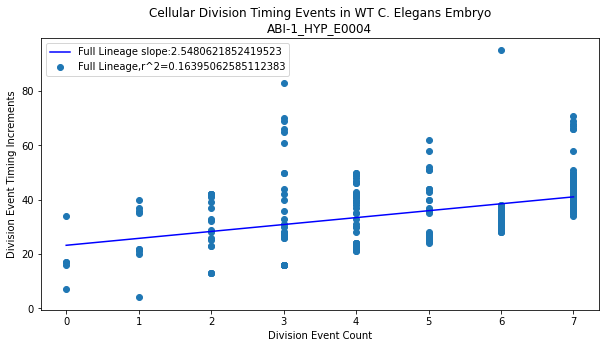

In [90]:
single_dim(nameset[1],dictset[1])

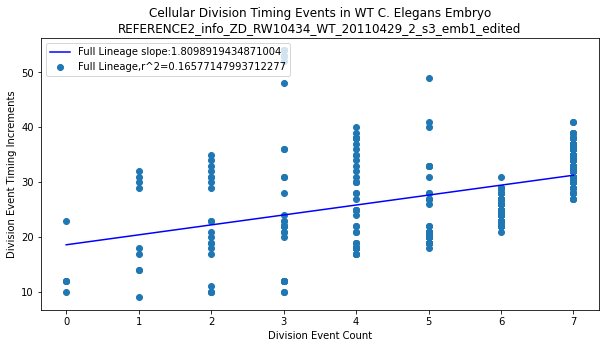

In [91]:
single_dim(refnameset[1],refdictset[1])

In [92]:
#single_dim(nameset[1],dictset[1], seps = 'AB')

In [93]:
#single_dim(refnameset[1],refdictset[1], seps = 'AB')

In [278]:
#single_dim(nameset[1],globaldictset[1])

In [279]:
#single_dim(refnameset[1],refglobaldictset[1])

In [98]:
#single_dim(nameset[1],globaldictset[1], seps = 'AB')

In [99]:
#single_dim(refnameset[1],refglobaldictset[1], seps = 'AB')

In [280]:
def dict_to_scatter(name,lis,x,y,img = False,seps='', tier = False):
    xaxis = [];yaxis = []
    target_xaxis=[];target_yaxis=[]
    if seps == '' or tier == True:
        for n in (list(set(lis[x]).intersection(set(lis[y])))):
            xaxis.append(lis[x][n]);yaxis.append(lis[y][n])
    else:
        target_xaxis=[];target_yaxis=[]
        for n in (list(set(lis[x]).intersection(set(lis[y])))):
            if seps in n:
                target_xaxis.append(lis[x][n])
                target_yaxis.append(lis[y][n])
            else:
                xaxis.append(lis[x][n]);yaxis.append(lis[y][n])
    target_xaxis = np.array(target_xaxis);xaxis = np.array(xaxis)
    if tier == True: return xaxis, yaxis
    m, b, r, p_value, std_err = stats.linregress(np.append(xaxis,target_xaxis),yaxis+target_yaxis)
    #switch to siegelslope & theilsslope functions?
    name1,name2 = name[x].split('/')[-1][:-4],name[y].split('/')[-1][:-4]
    if img == False: return m,b,r,name1,name2
    plt.scatter(xaxis,yaxis, label='Full Lineage,r^2='+str(r**2) ) #''', c = [0]*len(xaxis) ''')
    plt.title('Cellular Division Timing Discrepancies in WT C. Elegans Embryos');plt.xlabel(name1+'\nDivision Event Timing Increments');plt.ylabel(name2+'\nDivision Event Timing Increments')
    plt.plot(xaxis, (m*xaxis) + b, 'b-', label='Full Lineage slope:'+str(m), )
    if seps != '':
        target_xaxis = np.array(target_xaxis)
        m, b, r, p_value, std_err = stats.linregress(target_xaxis,target_yaxis)
        plt.plot(target_xaxis, (m*target_xaxis) + b, 'r-', label=seps+' slope:'+str(m))
        plt.scatter(target_xaxis,target_yaxis, label = seps+',r^2='+str(r**2) ) #''', c = [1]*len(target_xaxis) ''')
        xaxis = np.append(xaxis,target_xaxis); yaxis = np.append(yaxis,target_yaxis)
    m, b, r, p_value, std_err = stats.linregress(xaxis,yaxis)
    plt.legend(loc='upper left')
    #print(xaxis,target_xaxis)
    #print(np.append(xaxis,target_xaxis))
    #print(yaxis,target_yaxis)
    #print(np.append(yaxis,target_yaxis))
    #plt.savefig(name1+'&'+name2+'.png') #return m,b,r,name1,name2
    plt.show()

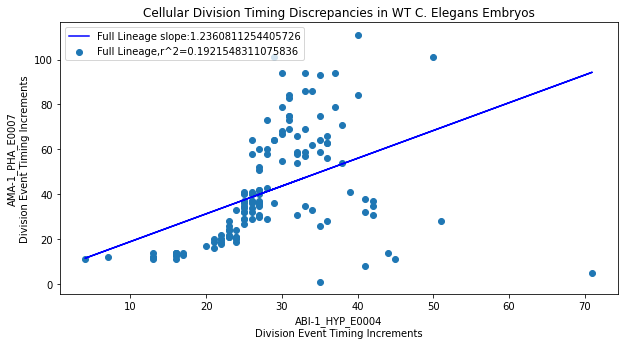

In [281]:
dict_to_scatter(nameset,dictset,1,10,img=True)

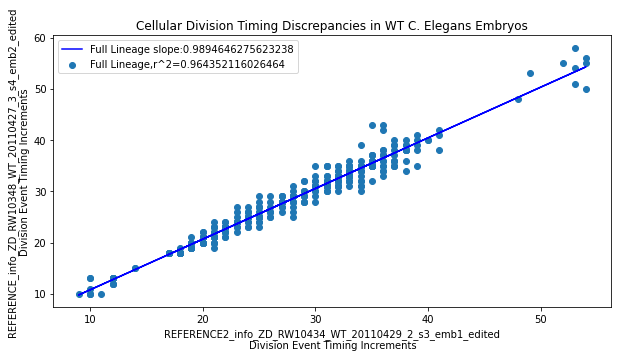

In [282]:
dict_to_scatter(refnameset,refdictset,1,10,img=True)

In [283]:
#dict_to_scatter(nameset,dictset,1,10,img=True,seps = 'AB')

In [284]:
#dict_to_scatter(refnameset,refdictset,1,10,img=True,seps = 'AB')

In [285]:
#dict_to_scatter(nameset,globaldictset,1,10,img=True)

In [286]:
#dict_to_scatter(refnameset,refglobaldictset,1,10,img=True)

In [287]:
#dict_to_scatter(nameset,globaldictset,1,10,img=True, seps = 'AB')

In [288]:
#dict_to_scatter(refnameset,refglobaldictset,1,10,img=True, seps = 'AB')

In [126]:
def match_fit(xaxis,yaxis):
    sorted_xaxis = np.array(range(min(xaxis),max(xaxis)))
    xaxis = np.array(xaxis)
    p1 = np.poly1d(np.polyfit(xaxis, yaxis, 1));p2 = np.poly1d(np.polyfit(xaxis, yaxis, 2));p3 = np.poly1d(np.polyfit(xaxis, yaxis, 3))
    plt.scatter(xaxis,yaxis, label='Lineage,r^2=') 
    corr_matrix = np.corrcoef(yaxis, p1(xaxis));corr = corr_matrix[0,1];R_sq = corr**2
    plt.plot(xaxis, p1(xaxis), 'b-', label='linear r^2:'+str(R_sq), )
    corr_matrix = np.corrcoef(yaxis, p2(xaxis));corr = corr_matrix[0,1];R_sq = corr**2
    plt.plot(sorted_xaxis, p2(sorted_xaxis), 'r-', label='quad r^2:'+str(R_sq), )
    corr_matrix = np.corrcoef(yaxis, p3(xaxis));corr = corr_matrix[0,1];R_sq = corr**2
    plt.plot(sorted_xaxis, p3(sorted_xaxis), 'g-', label='cubic r^2:'+str(R_sq), )
    plt.title('Cellular Division Timing Discrepancies in WT C. Elegans Embryos')
    #plt.xlabel(name1+'\nDivision Event Timing Increments')
    #plt.ylabel(name2+'\nDivision Event Timing Increments')
    
    
    plt.legend(loc='upper left')
    plt.show()

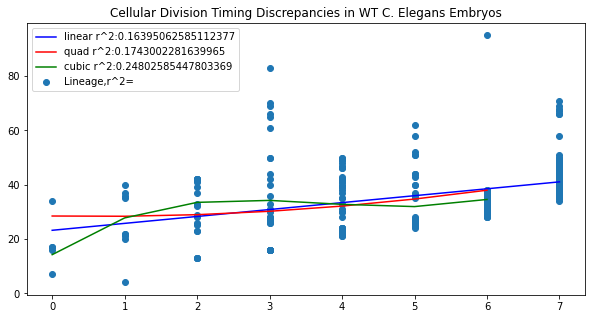

In [127]:
x,y = single_dim(nameset[1],dictset[1],tier = True);match_fit(x,y)

In [289]:
#x,y = single_dim(refnameset[1],refdictset[1],tier = True);match_fit(x,y)

In [290]:
#x,y = single_dim(nameset[1],globaldictset[1],tier = True);match_fit(x,y)

In [291]:
#x,y = single_dim(refnameset[1],refglobaldictset[1],tier = True);match_fit(x,y)

In [294]:
#x,y = dict_to_scatter(nameset,dictset,1,10,img=True,tier = True); match_fit(x,y)

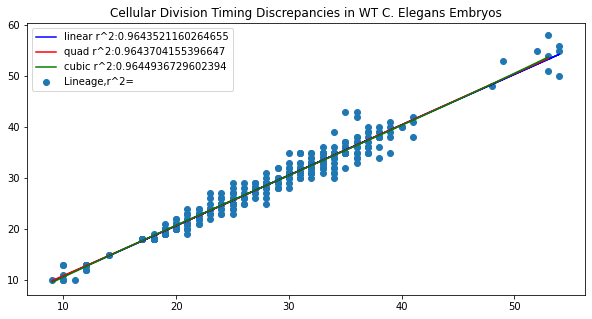

In [295]:
x,y = dict_to_scatter(refnameset,refdictset,1,10,img=True,tier = True); match_fit(x,y)

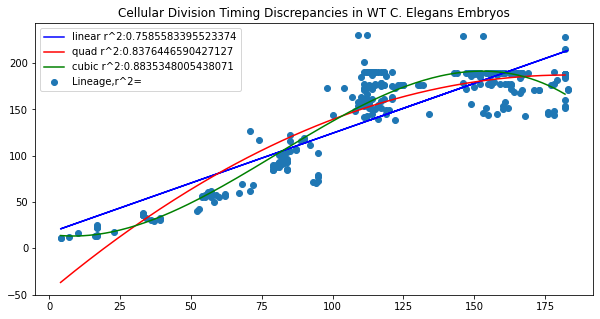

In [640]:
x,y = dict_to_scatter(nameset,globaldictset,1,10,img=True,tier = True); match_fit(x,y)

In [296]:
#x,y = dict_to_scatter(refnameset,refglobaldictset,1,10,img=True,tier = True); match_fit(x,y)

In [347]:

def dict_to_scatter_connect(name,lis,x,yname,ylis,y,img = False,seps='', tier = False):
    xaxis = [];yaxis = []
    target_xaxis=[];target_yaxis=[]
    if seps == '' or tier == True:
        for n in (list(set(lis[x]).intersection(set(ylis[y])))):
            xaxis.append(lis[x][n]);yaxis.append(ylis[y][n])
    else:
        target_xaxis=[];target_yaxis=[]
        for n in (list(set(lis[x]).intersection(set(ylis[y])))):
            if seps in n:
                target_xaxis.append(lis[x][n])
                target_yaxis.append(ylis[y][n])
            else:
                xaxis.append(lis[x][n]);yaxis.append(ylis[y][n])
    target_xaxis = np.array(target_xaxis);xaxis = np.array(xaxis)
    if tier == True: return xaxis, yaxis
    m, b, r, p_value, std_err = stats.linregress(np.append(xaxis,target_xaxis),yaxis+target_yaxis)
    #switch to siegelslope & theilsslope functions?
    name1,name2 = name[x].split('/')[-1][:-4],yname[y].split('/')[-1][:-4]
    if img == False: return m,b,r,name1,name2
    plt.scatter(xaxis,yaxis, label='Full Lineage,r^2='+str(r**2) ) #''', c = [0]*len(xaxis) ''')
    plt.title('Cellular Division Timing Discrepancies in WT C. Elegans Embryos');plt.xlabel(name1+'\nDivision Event Timing Increments');plt.ylabel(name2+'\nDivision Event Timing Increments')
    plt.plot(xaxis, (m*xaxis) + b, 'b-', label='Full Lineage slope:'+str(m), )
    if seps != '':
        target_xaxis = np.array(target_xaxis)
        m, b, r, p_value, std_err = stats.linregress(target_xaxis,target_yaxis)
        plt.plot(target_xaxis, (m*target_xaxis) + b, 'r-', label=seps+' slope:'+str(m))
        plt.scatter(target_xaxis,target_yaxis, label = seps+',r^2='+str(r**2) ) #''', c = [1]*len(target_xaxis) ''')
        xaxis = np.append(xaxis,target_xaxis); yaxis = np.append(yaxis,target_yaxis)
    m, b, r, p_value, std_err = stats.linregress(xaxis,yaxis)
    plt.legend(loc='upper left')
    #print(xaxis,target_xaxis)
    #print(np.append(xaxis,target_xaxis))
    #print(yaxis,target_yaxis)
    #print(np.append(yaxis,target_yaxis))
    #plt.savefig(name1+'&'+name2+'.png') #return m,b,r,name1,name2
    plt.show()
    
dict_to_scatter_connect(refnameset,refdictset,1,nameset,dictset,9)

(4.683294663573085,
 -18.198375870069597,
 0.5608291565417564,
 'REFERENCE2_info_ZD_RW10434_WT_20110429_2_s3_emb1_edited',
 'AMA-1_NEU_E0012')

In [339]:
len(list(cleaner(refdictset,refglobaldictset,1,match_links,dictset,globaldictset,78)))
#print(len(list(dictset[81])))

81


350

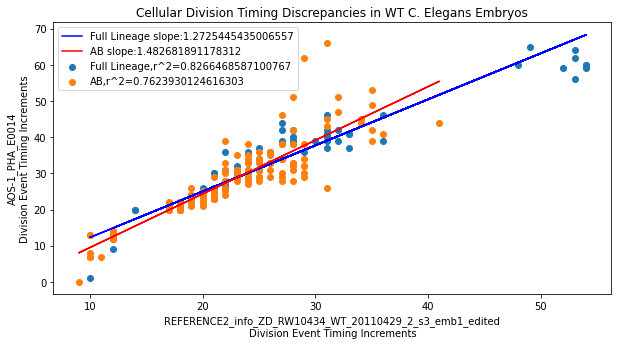

In [348]:
dict_to_scatter_connect(refnameset,refdictset,1,nameset,dictset,17,img=True, seps = 'AB')

In [341]:
#wed = 
#dict_to_scatter_connect(refnameset,refdictset,1,nameset,dictset,17,img=True, seps = 'AB')

In [342]:
def plot_2_examples(colormaps,imp): #heatmap matrix plotting function
    data = imp;n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n, n),
                            constrained_layout=False, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=(int(10*np.amin(imp))/10.0), vmax=(int(10*np.amax(imp))/10.0))
        fig.colorbar(psm, ax=ax)
    plt.title('Distance between times in WT C. Elegans')
    #plt.figure(figsize = (15,8))
    plt.gcf().set_size_inches(35, 8)
    plt.show()

In [343]:
'''
https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html#sphx-glr-auto-examples-neighbors-plot-kde-1d-py
'''

'\nhttps://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html#sphx-glr-auto-examples-neighbors-plot-kde-1d-py\n'

In [344]:
#dict_to_scatter_connect(refnameset,refdictset,1,nameset,dictset,9)
'''

r_mat = [];g_mat = [];s_mat=[];gs_mat=[]
for n in range(0,len(refnameset)):
    r_row = [];g_row = [];s_row=[];gs_row=[]
    for m in range(0,len(nameset)):
        m2,b,r,name1,name2 = dict_to_scatter_connect(refnameset,refdictset,n,nameset,dictset,m)
        r_row.append(r**2)
        m2,b,r,name1,name2 = dict_to_scatter_connect(refnameset,refglobaldictset,n,nameset,globaldictset,m)
        g_row.append(r**2)
        m2,b,r,name1,name2 = dict_to_scatter_connect(refnameset,refscrambledictset,n,nameset,scrambledictset,m)
        s_row.append(r**2)
        m2,b,r,name1,name2 = dict_to_scatter_connect(refnameset,refglobalscrambledictset,n,nameset,globalscrambledictset,m)
        gs_row.append(r**2)
    print(n/len(refnameset))
    r_mat.append(r_row);g_mat.append(g_row);s_mat.append(s_row);gs_mat.append(gs_row)
    #print(len(zee))
#r_mat.reverse()

r_mat = (np.mat(r_mat).T + np.mat(r_mat)) - np.diag([1]*len(r_mat))
g_mat = (np.mat(g_mat).T + np.mat(g_mat)) - np.diag([1]*len(g_mat))
s_mat = (np.mat(s_mat).T + np.mat(s_mat)) - np.diag([1]*len(s_mat))
gs_mat = (np.mat(gs_mat).T + np.mat(gs_mat)) - np.diag([1]*len(gs_mat))

scrambledictset = scramble(dictset)
globaldictset = globalize(dictset)
globalscrambledictset = globalize(scrambledictset)

refscrambledictset = scramble(refdictset)
refglobaldictset = globalize(refdictset)
refglobalscrambledictset = globalize(refscrambledictset)




'''
#plot_2_examples(['hot'],np.mat(r_mat))
sorttypes = ['cycle time','birth time', 'T.E.D', 'B.E.D. Cycle Time','B.E.D. Birth Time']
sortlists = [] 

In [345]:
#plot_2_examples(['hot'],np.mat(r_mat).T) #r^2 of plots
#np.mat(r_mat).shape

In [436]:
#x = np.argsort(np.mat(r_mat).sum(axis=0))'''
#x = np.argsort(np.mat(r_mat).sum(axis=0))
'''
r_mat = np.mat(r_mat)
x = np.array(np.argsort(np.mat(r_mat).sum(axis=0)))[0]
#print(len(x[0]),x[0])
#r_mat = np.mat(r_mat)
#plot_2_examples(['hot'],np.mat(r_mat[x]))
plot_2_examples(['hot'],np.mat(r_mat.T)[x]) 
sortlists.append(x)
sortlists
#np.mat(r_mat.T)[1]
'''

"\nr_mat = np.mat(r_mat)\nx = np.array(np.argsort(np.mat(r_mat).sum(axis=0)))[0]\n#print(len(x[0]),x[0])\n#r_mat = np.mat(r_mat)\n#plot_2_examples(['hot'],np.mat(r_mat[x]))\nplot_2_examples(['hot'],np.mat(r_mat.T)[x]) \nsortlists.append(x)\nsortlists\n#np.mat(r_mat.T)[1]\n"

In [437]:
'''sortlistT = [np.array(np.argsort(np.mat(r_mat).T.sum(axis=0)))[0]]
sortlistT'''

'sortlistT = [np.array(np.argsort(np.mat(r_mat).T.sum(axis=0)))[0]]\nsortlistT'

In [653]:
#clustering = AgglomerativeClustering(n_clusters = 2).fit(np.mat(r_mat))
#np.where(clustering.labels_ > 0)

In [438]:
'''
trip = np.triu(np.mat(r_mat))
trip = np.sort(trip.flatten())
#trip = trip[int(len(trip)/2):-truncator]

plt.hist(trip, bins = 200 )
'''
'''
trip = r_mat.sum(axis=0).tolist()[0]
trip

plt.hist(trip, bins = 15 )'''

'\ntrip = r_mat.sum(axis=0).tolist()[0]\ntrip\n\nplt.hist(trip, bins = 15 )'

In [439]:

'''
#trip = np.sort(np.array((trip).flatten))
#print(trip)

x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < 1) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.1, 700]);

'''

"\n#trip = np.sort(np.array((trip).flatten))\n#print(trip)\n\nx_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum((abs(xi - x_d) < 1) for xi in trip)\n\nplt.fill_between(x_d, density, alpha=0.5)\n#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\n\nplt.axis([min(trip), max(trip), -0.1, 700]);\n\n"

In [440]:
'''from scipy.stats import norm
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum(norm(xi,.5).pdf(x_d) for xi in trip) * 5
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 2000]);'''

"from scipy.stats import norm\nx_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum(norm(xi,.5).pdf(x_d) for xi in trip) * 5\nplt.fill_between(x_d, density, alpha=0.5)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\nplt.axis([min(trip), max(trip), -0.5, 2000]);"

In [441]:
'''plot_2_examples(['hot'],np.mat(g_mat).T) #r^2 of global'''



#np.mat(r_mat.T)[1]

"plot_2_examples(['hot'],np.mat(g_mat).T) #r^2 of global"

In [442]:

'''
g_mat = np.array(g_mat)

#x = np.argsort(np.mat(r_mat).sum(axis=0))
x = np.array(np.argsort(np.mat(g_mat).sum(axis=0)))[0]
#print(len(x[0]),x[0])
#r_mat = np.mat(r_mat)
#plot_2_examples(['hot'],np.mat(r_mat[x]))
plot_2_examples(['hot'],np.mat(g_mat.T)[x]) 

sortlists.append(x)
sortlists'''

"\ng_mat = np.array(g_mat)\n\n#x = np.argsort(np.mat(r_mat).sum(axis=0))\nx = np.array(np.argsort(np.mat(g_mat).sum(axis=0)))[0]\n#print(len(x[0]),x[0])\n#r_mat = np.mat(r_mat)\n#plot_2_examples(['hot'],np.mat(r_mat[x]))\nplot_2_examples(['hot'],np.mat(g_mat.T)[x]) \n\nsortlists.append(x)\nsortlists"

In [443]:
'''
sortlistT.append(np.array(np.argsort(np.mat(g_mat).T.sum(axis=0)))[0])
sortlistT
'''

'\nsortlistT.append(np.array(np.argsort(np.mat(g_mat).T.sum(axis=0)))[0])\nsortlistT\n'

In [444]:
'''trip = np.triu(np.mat(g_mat))
trip = np.sort(trip.flatten())
#trip = trip[int(len(trip)/2):-truncator]

plt.hist(trip, bins = 200 )'''
'''
trip = g_mat.sum(axis=0).tolist()
trip

plt.hist(trip )'''

'\ntrip = g_mat.sum(axis=0).tolist()\ntrip\n\nplt.hist(trip )'

In [445]:
'''x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < 0.2) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.1, 180]);'''

"x_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum((abs(xi - x_d) < 0.2) for xi in trip)\n\nplt.fill_between(x_d, density, alpha=0.5)\n#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\n\nplt.axis([min(trip), max(trip), -0.1, 180]);"

In [446]:
'''from scipy.stats import norm
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum(norm(xi,.5).pdf(x_d) for xi in trip) * 5
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 2000]);'''

"from scipy.stats import norm\nx_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum(norm(xi,.5).pdf(x_d) for xi in trip) * 5\nplt.fill_between(x_d, density, alpha=0.5)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\nplt.axis([min(trip), max(trip), -0.5, 2000]);"

In [663]:
#plot_2_examples(['hot'],np.mat(s_mat).T)
#s_mat = np.mat(s_mat)

In [664]:
''' trip = np.triu(np.mat(s_mat))
trip = np.sort(trip.flatten())
#trip = trip[int(len(trip)/2):-truncator]

plt.hist(trip, bins = 200 )'''



' trip = np.triu(np.mat(s_mat))\ntrip = np.sort(trip.flatten())\n#trip = trip[int(len(trip)/2):-truncator]\n\nplt.hist(trip, bins = 200 )'

In [665]:
#plot_2_examples(['hot'],np.mat(gs_mat).T)

In [447]:
'''

trip = np.triu(np.mat(gs_mat))
trip = np.sort(trip.flatten())
#trip = trip[int(len(trip)/2):-truncator]

plt.hist(trip, bins = 200 )
'''
'''
trip = g_mat.sum(axis=0).tolist()
trip

plt.hist(trip )'''

'\ntrip = g_mat.sum(axis=0).tolist()\ntrip\n\nplt.hist(trip )'

In [448]:
'''x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < 2) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.1, 1100]);'''

"x_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum((abs(xi - x_d) < 2) for xi in trip)\n\nplt.fill_between(x_d, density, alpha=0.5)\n#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\n\nplt.axis([min(trip), max(trip), -0.1, 1100]);"

In [449]:
'''from scipy.stats import norm
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum(norm(xi,.5).pdf(x_d) for xi in trip) * 5
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 2000]);'''

"from scipy.stats import norm\nx_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum(norm(xi,.5).pdf(x_d) for xi in trip) * 5\nplt.fill_between(x_d, density, alpha=0.5)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\nplt.axis([min(trip), max(trip), -0.5, 2000]);"

In [669]:
def tree_edit_distance(dict1,dict2): return (len((set(dict1).union(set(dict2))))-len((set(dict1).intersection(set(dict2)))))
#I guess issa metric
ted_list = []
t_mat = []
for n in range(0,len(refnameset)):
    r_row = []
    for m in range(0,len(nameset)):
        k = tree_edit_distance(refdictset[n],dictset[m])
        #print(len(refdictset[n]))
        r_row.append(k)
        ted_list.append(k)
    print(n/len(refnameset))
    t_mat.append(r_row)

#t_mat = (np.mat(t_mat).T + np.mat(t_mat)) - np.diag([1]*len(t_mat))

#for n in ted_list: print(n)

0.0
0.03333333333333333
0.06666666666666667
0.1
0.13333333333333333
0.16666666666666666
0.2
0.23333333333333334
0.26666666666666666
0.3
0.3333333333333333
0.36666666666666664
0.4
0.43333333333333335
0.4666666666666667
0.5
0.5333333333333333
0.5666666666666667
0.6
0.6333333333333333
0.6666666666666666
0.7
0.7333333333333333
0.7666666666666667
0.8
0.8333333333333334
0.8666666666666667
0.9
0.9333333333333333
0.9666666666666667


In [435]:
#plot_2_examples(['hot_r'],np.mat(t_mat).T)

In [434]:
'''x = np.argsort(t_mat.sum(axis=0))[0]#[::-1]

print(x)
plot_2_examples(['hot_r'],np.mat(t_mat[x][0]))


#x = np.argsort(np.mat(r_mat).sum(axis=0))
#x = np.argsort(np.mat(r_mat).sum(axis=0))
t_mat = np.mat(t_mat)
x = np.array(np.argsort(np.mat(t_mat).sum(axis=0)))[0]
x = np.flip(x, 0)


#print(len(x[0]),x[0])
#r_mat = np.mat(r_mat)
#plot_2_examples(['hot'],np.mat(r_mat[x]))
plot_2_examples(['hot_r'],np.mat(t_mat.T)[x]) 
refnameset[7],refnameset[10],refnameset[12],refnameset[25]

sortlists.append(x)
sortlists'''

"x = np.argsort(t_mat.sum(axis=0))[0]#[::-1]\n\nprint(x)\nplot_2_examples(['hot_r'],np.mat(t_mat[x][0]))\n\n\n#x = np.argsort(np.mat(r_mat).sum(axis=0))\n#x = np.argsort(np.mat(r_mat).sum(axis=0))\nt_mat = np.mat(t_mat)\nx = np.array(np.argsort(np.mat(t_mat).sum(axis=0)))[0]\nx = np.flip(x, 0)\n\n\n#print(len(x[0]),x[0])\n#r_mat = np.mat(r_mat)\n#plot_2_examples(['hot'],np.mat(r_mat[x]))\nplot_2_examples(['hot_r'],np.mat(t_mat.T)[x]) \nrefnameset[7],refnameset[10],refnameset[12],refnameset[25]\n\nsortlists.append(x)\nsortlists"

In [433]:
'''sortlistT.append(np.flip(np.array(np.argsort(np.mat(t_mat).T.sum(axis=0)))[0]))
sortlistT'''

'sortlistT.append(np.flip(np.array(np.argsort(np.mat(t_mat).T.sum(axis=0)))[0]))\nsortlistT'

In [432]:
'''
trip = np.triu(np.mat(t_mat))
trip = np.sort(trip.flatten())
#trip = trip[int(len(trip)/2)+truncator:]

plt.hist(trip, bins = 200 ) 

'''
'''
trip = t_mat.sum(axis=0).tolist()
trip

plt.hist(trip ) '''

'\ntrip = t_mat.sum(axis=0).tolist()\ntrip\n\nplt.hist(trip ) '

In [674]:
trip = t_mat.sum(axis=0).tolist()[0]
#trip

In [431]:
''' 
https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html
https://www.wessa.net/rwasp_density.wasp#output


x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < 70) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.5, 250]);'''

" \nhttps://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html\nhttps://www.wessa.net/rwasp_density.wasp#output\n\n\nx_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum((abs(xi - x_d) < 70) for xi in trip)\n\nplt.fill_between(x_d, density, alpha=0.5)\nplt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\n\nplt.axis([min(trip), max(trip), -0.5, 250]);"

In [430]:
'''from scipy.stats import norm
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum(norm(xi,25).pdf(x_d) for xi in trip) * 2
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 5]);'''

"from scipy.stats import norm\nx_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum(norm(xi,25).pdf(x_d) for xi in trip) * 2\nplt.fill_between(x_d, density, alpha=0.5)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\nplt.axis([min(trip), max(trip), -0.5, 5]);"

In [677]:
#print(t_mat[0])
#ted_mat_reals = np.where(-abs(np.array(t_mat)-100)+99 > 0, -1, 0)
#for n in range(len(np.array(ted_mat_real))): ted_mat_real[n][n] = (-np.sum(np.array(ted_mat_real)[n]))
#print(ted_mat_real)
#plot_2_examples(['hot'],np.mat(ted_mat_reals)) #black are edges

In [678]:
def branch_distance(dict1,dict2): #issa metric from deeds
    branch_dist = 0
    for n in list(set(dict1).intersection(set(dict2))):
        branch_dist = branch_dist + (dict1[n]-dict2[n])**2
        #print(n,(dict1[n]-dict2[n])**2, branch_dist)
    return (np.sqrt(branch_dist))

In [364]:
qf = pd.read_csv('1368-embryos.csv', header=None).iloc[0]
df = pd.read_csv('1368-embryos.csv')
rdf = df.sort_values(by = 'embryo-ID')
cuttags = ['ABa','ABp','C','D','E','MS','P']
rearranger = [0,1,4,5,3,2,6]
'''

'''
def cleaner(reflis,refgloballis,x,ML,explis,globalexplis,y):
    n = ML[y]
    tagref = 0
    #print(n)
    #print(rdf.iloc[n])
    burner = dict()
    for nm in list(refgloballis[x]):
        #print(nm)
        if cuttags[tagref] not in nm:
            try:
                tagref = tagref + 1
                if tagref > 6:
                    break
            except:
                break
        if refgloballis[x][nm] >= rdf.iloc[n][rearranger[tagref]+5]: #pass
            print(nm,refgloballis[x][nm],rdf.iloc[n][rearranger[tagref]+5])
        else:
            burner[nm] = reflis[x][nm]
    return burner

In [356]:
size_edit_mat = []
for n in range(0,len(nameset)):
    r_row = []
    for m in range(0,len(refnameset)):
        go = len(cleaner(refdictset,refglobaldictset,m,match_links,dictset,globaldictset,n))
        r_row.append(go)
    size_edit_mat.append(r_row)
    print(n/len(nameset))
    #print(len(zee))
#r_mat.reverse()
size_edit_mat = np.mat(size_edit_mat)

0.0
0.0007564296520423601
0.0015128593040847202
0.0022692889561270802
0.0030257186081694403
0.0037821482602118004
0.0045385779122541605
0.00529500756429652
0.006051437216338881
0.00680786686838124
0.007564296520423601
0.00832072617246596
0.009077155824508321
0.009833585476550681
0.01059001512859304
0.0113464447806354
0.012102874432677761
0.012859304084720122
0.01361573373676248
0.014372163388804841
0.015128593040847202
0.01588502269288956
0.01664145234493192
0.01739788199697428
0.018154311649016642
0.018910741301059002
0.019667170953101363
0.02042360060514372
0.02118003025718608
0.02193645990922844
0.0226928895612708
0.023449319213313162
0.024205748865355523
0.024962178517397883
0.025718608169440244
0.0264750378214826
0.02723146747352496
0.02798789712556732
0.028744326777609682
0.029500756429652043
0.030257186081694403
0.031013615733736764
0.03177004538577912
0.03252647503782148
0.03328290468986384
0.0340393343419062
0.03479576399394856
0.03555219364599092
0.036308623298033284
0.037065

0.31391830559757944
0.3146747352496218
0.3154311649016641
0.3161875945537065
0.31694402420574885
0.3177004538577912
0.3184568835098336
0.31921331316187596
0.3199697428139183
0.3207261724659607
0.321482602118003
0.32223903177004537
0.32299546142208774
0.3237518910741301
0.3245083207261725
0.32526475037821484
0.3260211800302572
0.3267776096822995
0.3275340393343419
0.32829046898638425
0.3290468986384266
0.329803328290469
0.33055975794251136
0.3313161875945537
0.3320726172465961
0.3328290468986384
0.33358547655068077
0.33434190620272314
0.3350983358547655
0.3358547655068079
0.33661119515885024
0.3373676248108926
0.3381240544629349
0.3388804841149773
0.33963691376701965
0.340393343419062
0.3411497730711044
0.34190620272314676
0.3426626323751891
0.3434190620272315
0.3441754916792738
0.34493192133131617
0.34568835098335854
0.3464447806354009
0.3472012102874433
0.34795763993948564
0.348714069591528
0.3494704992435703
0.3502269288956127
0.35098335854765506
0.3517397881996974
0.3524962178517398

0.6391830559757943
0.6399394856278366
0.640695915279879
0.6414523449319214
0.6422087745839636
0.642965204236006
0.6437216338880484
0.6444780635400907
0.6452344931921331
0.6459909228441755
0.6467473524962178
0.6475037821482602
0.6482602118003026
0.649016641452345
0.6497730711043873
0.6505295007564297
0.651285930408472
0.6520423600605144
0.6527987897125568
0.653555219364599
0.6543116490166414
0.6550680786686838
0.6558245083207261
0.6565809379727685
0.6573373676248109
0.6580937972768532
0.6588502269288956
0.659606656580938
0.6603630862329803
0.6611195158850227
0.6618759455370651
0.6626323751891074
0.6633888048411498
0.6641452344931922
0.6649016641452344
0.6656580937972768
0.6664145234493192
0.6671709531013615
0.6679273827534039
0.6686838124054463
0.6694402420574886
0.670196671709531
0.6709531013615734
0.6717095310136157
0.6724659606656581
0.6732223903177005
0.6739788199697428
0.6747352496217852
0.6754916792738276
0.6762481089258698
0.6770045385779122
0.6777609682299546
0.6785173978819969


0.9682299546142209
0.9689863842662633
0.9697428139183056
0.970499243570348
0.9712556732223904
0.9720121028744326
0.972768532526475
0.9735249621785174
0.9742813918305597
0.9750378214826021
0.9757942511346445
0.9765506807866868
0.9773071104387292
0.9780635400907716
0.9788199697428139
0.9795763993948563
0.9803328290468987
0.981089258698941
0.9818456883509834
0.9826021180030258
0.983358547655068
0.9841149773071104
0.9848714069591528
0.9856278366111951
0.9863842662632375
0.9871406959152799
0.9878971255673222
0.9886535552193646
0.989409984871407
0.9901664145234493
0.9909228441754917
0.9916792738275341
0.9924357034795764
0.9931921331316188
0.9939485627836612
0.9947049924357034
0.9954614220877458
0.9962178517397882
0.9969742813918305
0.9977307110438729
0.9984871406959153
0.9992435703479576


In [369]:
result = np.where(size_edit_mat < 0)
result

(array([  27,   28,   28,   45,   45,  116,  116,  127,  127,  127,  127,
         127,  127,  127,  127,  127,  127,  127,  127,  127,  127,  127,
         127,  127,  127,  183,  183,  202,  202,  229,  229,  230,  230,
         238,  238,  240,  240,  240,  240,  240,  240,  240,  240,  240,
         240,  240,  240,  240,  240,  240,  240,  240,  240,  247,  247,
         247,  247,  247,  247,  247,  247,  247,  247,  247,  247,  247,
         247,  247,  247,  247,  247,  288,  288,  330,  330,  331,  331,
         349,  349,  490,  490,  528,  528,  540,  540,  540,  540,  540,
         540,  540,  540,  540,  540,  540,  540,  540,  540,  540,  540,
         540,  540,  541,  541,  558,  558,  558,  558,  558,  558,  558,
         558,  558,  558,  558,  558,  558,  558,  558,  558,  558,  558,
         577,  577,  577,  577,  577,  577,  577,  577,  577,  577,  577,
         577,  577,  577,  577,  577,  577,  577,  577,  577,  577,  577,
         577,  577,  577,  577,  578, 

In [404]:
#cleaner(refdictset,refglobaldictset,25,match_links,dictset,globaldictset,45)
emb_group = []
emb_crop = []
o = 0
referencial_exp_embryos = list(set(result[0]))
referencial_exp_embryos.sort()
for n in range(0,len(result[1])-1):
    if result[1][n] > result[1][n+1]:
        emb_crop.append(result[1][n])
        emb_group.append([referencial_exp_embryos[o],emb_crop])
        emb_crop = []; o = o + 1
    else:
        emb_crop.append(result[1][n])

In [405]:
#set(result[0])

In [406]:
emb_group

[[27, [25]],
 [28, [3, 25]],
 [45, [3, 25]],
 [116, [3, 25]],
 [127, [0, 2, 3, 4, 5, 6, 9, 11, 12, 13, 14, 15, 21, 24, 25, 27, 28, 29]],
 [183, [3, 25]],
 [202, [3, 25]],
 [229, [3, 25]],
 [230, [3, 25]],
 [238, [3, 25]],
 [240, [0, 2, 3, 4, 5, 6, 9, 11, 12, 13, 14, 15, 21, 24, 25, 27, 28, 29]],
 [247, [0, 2, 3, 4, 5, 6, 9, 11, 12, 13, 14, 15, 21, 24, 25, 27, 28, 29]],
 [288, [3, 25]],
 [330, [3, 25]],
 [331, [3, 25]],
 [349, [3, 25]],
 [490, [3, 25]],
 [528, [3, 25]],
 [540, [0, 2, 3, 4, 5, 6, 9, 11, 12, 13, 14, 15, 21, 24, 25, 27, 28, 29]],
 [541, [3, 25]],
 [558, [0, 2, 3, 4, 5, 6, 9, 11, 12, 13, 14, 15, 21, 24, 25, 27, 28, 29]],
 [577,
  [0,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   17,
   18,
   19,
   21,
   22,
   23,
   24,
   25,
   27,
   28,
   29]],
 [578, [3, 25]],
 [640, [3, 25]],
 [660, [3, 25]],
 [711, [0, 2, 3, 4, 5, 6, 9, 11, 12, 13, 14, 15, 21, 24, 25, 27, 28, 29]],
 [780, [3, 25, 25]],
 [793, [2, 3, 4, 5, 12, 15, 24

In [367]:
len(cleaner(refdictset,refglobaldictset,25,match_links,dictset,globaldictset,27))

MSaaapp 165 165


349

In [407]:


'''

b_mat = [];bg_mat = [];bs_mat=[];bgs_mat=[]

for n in range(0,len(refnameset)):
    r_row = [];g_row = [];s_row=[];gs_row=[]
    for m in range(0,len(nameset)):
        r_row.append(branch_distance(refdictset[n],dictset[m]))
        g_row.append(branch_distance(refglobaldictset[n],globaldictset[m]))
        s_row.append(branch_distance(refscrambledictset[n],scrambledictset[m]))
        gs_row.append(branch_distance(refglobalscrambledictset[n],globalscrambledictset[m]))
    zee = [] #( [0] * (30 - m - 1))
    b_mat.append(r_row+zee);bg_mat.append(g_row+zee);bs_mat.append(s_row+zee);bgs_mat.append(gs_row+zee)
    print(n/len(refnameset))
    #print(len(zee))
#r_mat.reverse()

b_mat = (np.mat(b_mat).T + np.mat(b_mat)) - np.diag([1]*len(b_mat))
bg_mat = (np.mat(bg_mat).T + np.mat(bg_mat)) - np.diag([1]*len(bg_mat))
bs_mat = (np.mat(bs_mat).T + np.mat(bs_mat)) - np.diag([1]*len(bs_mat))
bgs_mat = (np.mat(bgs_mat).T + np.mat(bgs_mat)) - np.diag([1]*len(bgs_mat))'''


'\n\nb_mat = [];bg_mat = [];bs_mat=[];bgs_mat=[]\n\nfor n in range(0,len(refnameset)):\n    r_row = [];g_row = [];s_row=[];gs_row=[]\n    for m in range(0,len(nameset)):\n        r_row.append(branch_distance(refdictset[n],dictset[m]))\n        g_row.append(branch_distance(refglobaldictset[n],globaldictset[m]))\n        s_row.append(branch_distance(refscrambledictset[n],scrambledictset[m]))\n        gs_row.append(branch_distance(refglobalscrambledictset[n],globalscrambledictset[m]))\n    zee = [] #( [0] * (30 - m - 1))\n    b_mat.append(r_row+zee);bg_mat.append(g_row+zee);bs_mat.append(s_row+zee);bgs_mat.append(gs_row+zee)\n    print(n/len(refnameset))\n    #print(len(zee))\n#r_mat.reverse()\n\nb_mat = (np.mat(b_mat).T + np.mat(b_mat)) - np.diag([1]*len(b_mat))\nbg_mat = (np.mat(bg_mat).T + np.mat(bg_mat)) - np.diag([1]*len(bg_mat))\nbs_mat = (np.mat(bs_mat).T + np.mat(bs_mat)) - np.diag([1]*len(bs_mat))\nbgs_mat = (np.mat(bgs_mat).T + np.mat(bgs_mat)) - np.diag([1]*len(bgs_mat))'

In [408]:
#np.matrix(b_mat).T

In [409]:
#plot_2_examples(['hot_r'],np.mat(b_mat).T)

In [420]:
'''x = np.argsort(b_mat.sum(axis=0))[0]#[::-1]
x = np.flip(x, 1)
print(x)
plot_2_examples(['hot_r'],np.mat(b_mat[x][0]))

b_mat = np.mat(b_mat)
x = np.array(np.argsort(np.mat(b_mat).sum(axis=0)))[0]
x = np.flip(x, 0)
#print(len(x[0]),x[0])
#r_mat = np.mat(r_mat)
#plot_2_examples(['hot'],np.mat(r_mat[x]))
plot_2_examples(['hot_r'],np.mat(b_mat.T)[x]) 
sortlists.append(x)
sortlists'''

"x = np.argsort(b_mat.sum(axis=0))[0]#[::-1]\nx = np.flip(x, 1)\nprint(x)\nplot_2_examples(['hot_r'],np.mat(b_mat[x][0]))\n\nb_mat = np.mat(b_mat)\nx = np.array(np.argsort(np.mat(b_mat).sum(axis=0)))[0]\nx = np.flip(x, 0)\n#print(len(x[0]),x[0])\n#r_mat = np.mat(r_mat)\n#plot_2_examples(['hot'],np.mat(r_mat[x]))\nplot_2_examples(['hot_r'],np.mat(b_mat.T)[x]) \nsortlists.append(x)\nsortlists"

In [421]:
#sortlistT.append(  np.flip(np.array(np.argsort(np.mat(b_mat).T.sum(axis=0)))[0], 0)   )
#sortlistT

In [422]:
'''trip = np.triu(np.mat(b_mat))
trip = np.sort(trip.flatten())
#trip = trip[int(len(trip)/2)+truncator:]

plt.hist(trip, bins = 200 )




trip = b_mat.sum(axis=0)/200

trip = trip.tolist()[0]

plt.hist(trip ) 
'''

'trip = np.triu(np.mat(b_mat))\ntrip = np.sort(trip.flatten())\n#trip = trip[int(len(trip)/2)+truncator:]\n\nplt.hist(trip, bins = 200 )\n\n\n\n\ntrip = b_mat.sum(axis=0)/200\n\ntrip = trip.tolist()[0]\n\nplt.hist(trip ) \n'

In [423]:
'''x_d = np.linspace(min(trip), max(trip), 20000)
density = sum((abs(xi - x_d) < 1) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)

plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.1, 75]);'''

"x_d = np.linspace(min(trip), max(trip), 20000)\ndensity = sum((abs(xi - x_d) < 1) for xi in trip)\n\nplt.fill_between(x_d, density, alpha=0.5)\n\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\n\nplt.axis([min(trip), max(trip), -0.1, 75]);"

In [424]:
'''from scipy.stats import norm
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum(norm(xi,1).pdf(x_d) for xi in trip) * 1
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 59]);'''

"from scipy.stats import norm\nx_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum(norm(xi,1).pdf(x_d) for xi in trip) * 1\nplt.fill_between(x_d, density, alpha=0.5)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\nplt.axis([min(trip), max(trip), -0.5, 59]);"

In [425]:
#plot_2_examples(['hot_r'],np.mat(bg_mat).T)

In [426]:
'''x = np.argsort(bg_mat.sum(axis=0))[0]#[::-1]
x = np.flip(x, 1)
print(x)
plot_2_examples(['hot_r'],np.mat(bg_mat[x][0]))


bg_mat = np.mat(bg_mat)
x = np.array(np.argsort(np.mat(bg_mat).sum(axis=0)))[0]
x = np.flip(x, 0)
#print(len(x[0]),x[0])
#r_mat = np.mat(r_mat)
#plot_2_examples(['hot'],np.mat(r_mat[x]))
plot_2_examples(['hot_r'],np.mat(bg_mat.T)[x]) 
sortlists.append(x)
sortlists'''

"x = np.argsort(bg_mat.sum(axis=0))[0]#[::-1]\nx = np.flip(x, 1)\nprint(x)\nplot_2_examples(['hot_r'],np.mat(bg_mat[x][0]))\n\n\nbg_mat = np.mat(bg_mat)\nx = np.array(np.argsort(np.mat(bg_mat).sum(axis=0)))[0]\nx = np.flip(x, 0)\n#print(len(x[0]),x[0])\n#r_mat = np.mat(r_mat)\n#plot_2_examples(['hot'],np.mat(r_mat[x]))\nplot_2_examples(['hot_r'],np.mat(bg_mat.T)[x]) \nsortlists.append(x)\nsortlists"

In [427]:
#sortlistT.append(np.flip(np.array(np.argsort(np.mat(bg_mat).T.sum(axis=0)))[0], 0))
#sortlistT

In [428]:
'''trip = np.triu(np.mat(bg_mat))
trip = np.sort(trip.flatten())
#trip = trip[int(len(trip)/2)+truncator:]

plt.hist(trip, bins =200 ) 

trip = bg_mat.sum(axis=0)/200

trip = trip.tolist()[0]

plt.hist(trip ) '''


'trip = np.triu(np.mat(bg_mat))\ntrip = np.sort(trip.flatten())\n#trip = trip[int(len(trip)/2)+truncator:]\n\nplt.hist(trip, bins =200 ) \n\ntrip = bg_mat.sum(axis=0)/200\n\ntrip = trip.tolist()[0]\n\nplt.hist(trip ) '

In [429]:
'''x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < 5) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.1, 170]);'''

"x_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum((abs(xi - x_d) < 5) for xi in trip)\n\nplt.fill_between(x_d, density, alpha=0.5)\n#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\n\nplt.axis([min(trip), max(trip), -0.1, 170]);"

In [410]:
'''from scipy.stats import norm
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum(norm(xi,4).pdf(x_d) for xi in trip) * 1
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 20]);'''

"from scipy.stats import norm\nx_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum(norm(xi,4).pdf(x_d) for xi in trip) * 1\nplt.fill_between(x_d, density, alpha=0.5)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\nplt.axis([min(trip), max(trip), -0.5, 20]);"

In [411]:
'''plot_2_examples(['hot_r'],np.mat(bs_mat).T)'''

"plot_2_examples(['hot_r'],np.mat(bs_mat).T)"

In [412]:
'''trip = np.triu(np.mat(bs_mat))
trip = np.sort(trip.flatten())
#trip = trip[int(len(trip)/2)+truncator:]

plt.hist(trip, bins = 200 )'''

'trip = np.triu(np.mat(bs_mat))\ntrip = np.sort(trip.flatten())\n#trip = trip[int(len(trip)/2)+truncator:]\n\nplt.hist(trip, bins = 200 )'

In [413]:
'''x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < .45) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.1, 210]);'''

"x_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum((abs(xi - x_d) < .45) for xi in trip)\n\nplt.fill_between(x_d, density, alpha=0.5)\n#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\n\nplt.axis([min(trip), max(trip), -0.1, 210]);"

In [414]:
'''plot_2_examples(['hot_r'],np.mat(bgs_mat).T)'''

"plot_2_examples(['hot_r'],np.mat(bgs_mat).T)"

In [415]:
'''trip = np.triu(np.mat(bgs_mat))
trip = np.sort(trip.flatten())
#trip = trip[int(len(trip)/2)+truncator:]

plt.hist(trip, bins = 200)'''

'trip = np.triu(np.mat(bgs_mat))\ntrip = np.sort(trip.flatten())\n#trip = trip[int(len(trip)/2)+truncator:]\n\nplt.hist(trip, bins = 200)'

In [416]:
'''
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < .5) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.1, 70]);'''

"\nx_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum((abs(xi - x_d) < .5) for xi in trip)\n\nplt.fill_between(x_d, density, alpha=0.5)\n#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\n\nplt.axis([min(trip), max(trip), -0.1, 70]);"

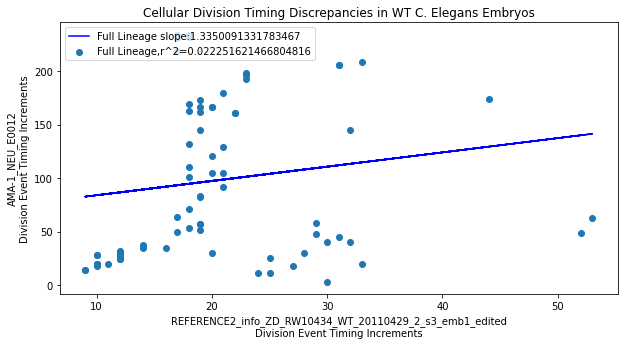

In [699]:
def dict_to_scatter_connect(name,lis,x,yname,ylis,y,img = False,seps='', tier = False):
    xaxis = [];yaxis = []
    target_xaxis=[];target_yaxis=[]
    if seps == '' or tier == True:
        for n in (list(set(lis[x]).intersection(set(ylis[y])))):
            xaxis.append(lis[x][n]);yaxis.append(ylis[y][n])
    else:
        target_xaxis=[];target_yaxis=[]
        for n in (list(set(lis[x]).intersection(set(ylis[y])))):
            if seps in n:
                target_xaxis.append(lis[x][n])
                target_yaxis.append(ylis[y][n])
            else:
                xaxis.append(lis[x][n]);yaxis.append(ylis[y][n])
    target_xaxis = np.array(target_xaxis);xaxis = np.array(xaxis)
    if tier == True: return xaxis, yaxis
    m, b, r, p_value, std_err = stats.linregress(np.append(xaxis,target_xaxis),yaxis+target_yaxis)
    #switch to siegelslope & theilsslope functions?
    name1,name2 = name[x].split('/')[-1][:-4],yname[y].split('/')[-1][:-4]
    if img == False: return m,b,r,name1,name2
    plt.scatter(xaxis,yaxis, label='Full Lineage,r^2='+str(r**2) ) #''', c = [0]*len(xaxis) ''')
    plt.title('Cellular Division Timing Discrepancies in WT C. Elegans Embryos');plt.xlabel(name1+'\nDivision Event Timing Increments');plt.ylabel(name2+'\nDivision Event Timing Increments')
    plt.plot(xaxis, (m*xaxis) + b, 'b-', label='Full Lineage slope:'+str(m), )
    if seps != '':
        target_xaxis = np.array(target_xaxis)
        m, b, r, p_value, std_err = stats.linregress(target_xaxis,target_yaxis)
        plt.plot(target_xaxis, (m*target_xaxis) + b, 'r-', label=seps+' slope:'+str(m))
        plt.scatter(target_xaxis,target_yaxis, label = seps+',r^2='+str(r**2) ) #''', c = [1]*len(target_xaxis) ''')
        xaxis = np.append(xaxis,target_xaxis); yaxis = np.append(yaxis,target_yaxis)
    m, b, r, p_value, std_err = stats.linregress(xaxis,yaxis)
    plt.legend(loc='upper left')
    #print(xaxis,target_xaxis)
    #print(np.append(xaxis,target_xaxis))
    #print(yaxis,target_yaxis)
    #print(np.append(yaxis,target_yaxis))
    #plt.savefig(name1+'&'+name2+'.png') #return m,b,r,name1,name2
    plt.show()
    
dict_to_scatter_connect(refnameset,refdictset,1,nameset,dictset,9,img=True)

In [700]:
#np.matrix(sortlistT)[0]

matrix([[ 3,  9,  4, 17, 26, 25, 19,  7, 20, 18, 21,  8, 23, 11, 24,  0,
          1, 12, 16, 15, 10, 28,  6,  5, 14,  2, 29, 13, 27, 22]])

In [701]:
#g_mat[np.matrix(sortlistT)[1]]

array([[[0.91237203, 0.93689601, 0.90195533, ..., 0.80570021,
         0.90909603, 0.85504777],
        [0.93024879, 0.95207912, 0.92164223, ..., 0.81963335,
         0.9205487 , 0.86285641],
        [0.93694106, 0.95370612, 0.92906908, ..., 0.8278788 ,
         0.9307099 , 0.8831462 ],
        ...,
        [0.97678162, 0.97205054, 0.97691177, ..., 0.84227352,
         0.95550595, 0.9257629 ],
        [0.97099443, 0.96196401, 0.97096123, ..., 0.84327881,
         0.95413328, 0.92091665],
        [0.96586994, 0.95722798, 0.9662525 , ..., 0.85281392,
         0.95559744, 0.9261721 ]]])

In [702]:
#t_mat[sortlistT[2]]

In [703]:
#sortlistT

[array([ 3,  9,  4, 17, 26, 25, 19,  7, 20, 18, 21,  8, 23, 11, 24,  0,  1,
        12, 16, 15, 10, 28,  6,  5, 14,  2, 29, 13, 27, 22]),
 array([25, 23,  4,  3, 17, 11,  5, 22, 21, 12, 20, 15, 13, 27, 18, 29,  9,
         0,  6, 26, 19,  1,  8, 14, 28,  2, 24, 10, 16,  7]),
 array([29, 28,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,  0]),
 array([25,  3,  4, 23, 11, 17, 18, 15,  9, 12,  0, 26, 29, 19,  1, 20,  5,
         6,  7, 21, 13,  8, 24, 10, 16,  2, 14, 28, 22, 27]),
 array([20, 17, 23,  1, 19, 22,  9,  8, 26, 10, 25, 16, 21, 15, 12,  6, 13,
        27,  5, 29, 18,  4,  7,  0, 11, 14, 28, 24,  3,  2])]

In [418]:
'''def aggregate_rank_function(x):
    reflist = sorted(x[0])
    ranklist = []
    for n in reflist:
        gimp = 0
        for m in x:
            if type(m) != type([]): k = m.tolist()#[0]
            else: k = m
            gimp = gimp + k.index(n)
        ranklist.append((n,gimp))
    return ranklist

x = aggregate_rank_function(sortlistT)
x.sort(key=lambda x:x[1])
x'''

'def aggregate_rank_function(x):\n    reflist = sorted(x[0])\n    ranklist = []\n    for n in reflist:\n        gimp = 0\n        for m in x:\n            if type(m) != type([]): k = m.tolist()#[0]\n            else: k = m\n            gimp = gimp + k.index(n)\n        ranklist.append((n,gimp))\n    return ranklist\n\nx = aggregate_rank_function(sortlistT)\nx.sort(key=lambda x:x[1])\nx'

In [419]:
#np.mat(t_mat).T.sum(axis=0)

In [706]:
'''
def tree_edit_distance(dict1,dict2):
    return len(set(dict1).symmetric_difference(dict2))
    #return (len((set(dict1).union(set(dict2))))-len((set(dict1).intersection(set(dict2)))))
#I guess issa metric
ted_list = []
t_mat = []
for n in range(0,len(refnameset)):
    r_row = []
    for m in range(0,len(nameset)):
        k = tree_edit_distance(refdictset[n],dictset[m])
        r_row.append(k)
        ted_list.append(k)
    print(n/len(refnameset))
    t_mat.append(r_row)
'''
#t_mat = (np.mat(t_mat).T + np.mat(t_mat)) - np.diag([1]*len(t_mat))

#for n in ted_list: print(n)

'\ndef tree_edit_distance(dict1,dict2):\n    return len(set(dict1).symmetric_difference(dict2))\n    #return (len((set(dict1).union(set(dict2))))-len((set(dict1).intersection(set(dict2)))))\n#I guess issa metric\nted_list = []\nt_mat = []\nfor n in range(0,len(refnameset)):\n    r_row = []\n    for m in range(0,len(nameset)):\n        k = tree_edit_distance(refdictset[n],dictset[m])\n        r_row.append(k)\n        ted_list.append(k)\n    print(n/len(refnameset))\n    t_mat.append(r_row)\n'

In [707]:
#plot_2_examples(['hot_r'],np.mat(t_mat).T)

In [31]:
#for n in refdictset: print(len(n))